In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
from sqlalchemy import Column, Integer, String, Float

In [2]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [3]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [4]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [5]:
class station(Base):
  __tablename__ = "station"
  id = Column(Integer, primary_key=True)
  station=Column(String)
  name = Column(String)
  latitude   = Column(Float)
  longitude  = Column(Float)
  elevation  = Column(Float)

In [6]:
class measurement(Base):
  __tablename__ = "measurement"
  id = Column(Integer, primary_key=True)
  station=Column(String)
  date = Column(String)
  prcp = Column(Float)
  tobs = Column(Float)    

In [7]:
Base.metadata.create_all(engine)

In [8]:
from sqlalchemy import func
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from sqlalchemy.sql.expression import text
session = Session(bind=engine)

## Precipitation Analysis

In [9]:
tab1=session.query(measurement.date,measurement.prcp).filter(measurement.date.between('2016-08-23', '2017-08-23'))

In [10]:
date = []
prcp = []
for data in tab1:
    date.append(data[0])
    prcp.append(data[1])
    
prcp_df = pd.DataFrame(list(zip(date, prcp)), 
               columns =['Date', 'PRCP']) 

In [11]:
prcp_df=prcp_df.set_index('Date')

In [12]:
prcp_df=prcp_df.sort_index(ascending=False)

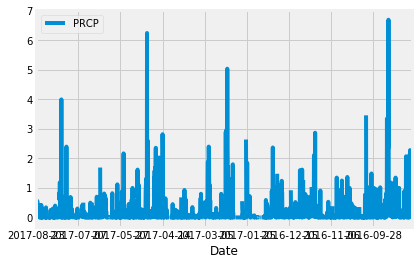

In [13]:
prcp_df.plot()

In [14]:
prcp_df.describe()

,PRCP
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [15]:
#Design a query to calculate the total number of stations
tabstation=session.query(station.station).\
    count()
print(tabstation)

9


In [16]:
obs=session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
obs

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).first()

(53.0, 87.0, 73.09795396419437)

In [18]:
#USC00519281
from sqlalchemy import and_
station_year_ago = session.query(measurement.tobs).\
    filter(and_(measurement.date.between('2016-08-23', '2017-08-23'),measurement.station=='USC00519281')).all()
station_year_ago

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [19]:
tobs = pd.DataFrame(station_year_ago, 
               columns =['TOBS'])
tobs

,TOBS
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


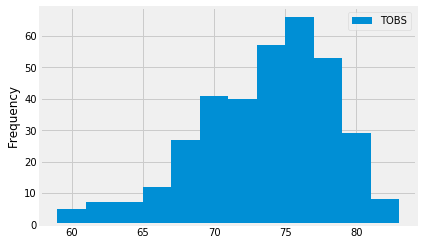

In [20]:
tobs.plot.hist(bins=12)

In [30]:
#date='2016-01-01'
#session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
#filter(measurement.date >= date).first()

(56.0, 87.0, 74.14409066378845)

In [33]:
#start='2016-08-23'
#end='2017-08-23'
#session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
#filter(measurement.date.between(start,end)).first()

(58.0, 87.0, 74.59058295964125)